In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf
import sklearn as skl
import datetime 

C:\Users\sebac\anaconda3\envs\pythondate\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sebac\anaconda3\envs\pythondate\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sebac\anaconda3\envs\pythondate\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sebac\anaconda3\envs\pythondate\lib\site-packages

In [2]:
trump_df = pd.read_csv("trump1_2020.csv")
trump_df.head(5)

C:\Users\sebac\anaconda3\envs\pythondate\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.312910e+18,1.312860e+18,2020-10-04 19:59:59 Eastern Daylight Time,10/4/2020,19:59:59,-400,1.252360e+18,edwardg51650120,Edward Graham,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '963790885937995777', 'username': ...",NaN,NaN,NaN,NaN
1,1.312910e+18,1.312790e+18,2020-10-04 19:59:59 Eastern Daylight Time,10/4/2020,19:59:59,-400,1.237850e+18,covidwatcher,carla,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '72601708', 'username': 'bonnieand...",NaN,NaN,NaN,NaN
2,1.312910e+18,1.312890e+18,2020-10-04 19:59:59 Eastern Daylight Time,10/4/2020,19:59:59,-400,8.260320e+17,jhatchett1971,Jennifer Hatchett,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '1045558231', 'username': 'VFL2013'}",NaN,NaN,NaN,NaN
3,1.312910e+18,1.312870e+18,2020-10-04 19:59:59 Eastern Daylight Time,10/4/2020,19:59:59,-400,2.655506e+08,byrdluver,Misanthropic Birdwatcher,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '537795028', 'username': 'JReinerMD'}",NaN,NaN,NaN,NaN
4,1.312910e+18,1.312860e+18,2020-10-04 19:59:59 Eastern Daylight Time,10/4/2020,19:59:59,-400,6.250172e+08,iceboundrio,tarzan,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'user_id': '2923474450', 'username': 'mclaure...",NaN,NaN,NaN,NaN


In [3]:
trump_df.dtypes

id                 float64
conversation_id    float64
created_at          object
date                object
time                object
timezone             int64
user_id            float64
username            object
name                object
place               object
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet            float64
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

In [4]:
trump_df.isnull().sum(axis = 0)

id                      0
conversation_id         0
created_at              0
date                    0
time                    0
timezone                0
user_id                 0
username                0
name                   85
place              628535
tweet                   0
language                0
mentions                0
urls                    0
photos                  0
replies_count           0
retweets_count          0
likes_count             0
hashtags                0
cashtags                0
link                    0
retweet            628596
quote_url          596097
video                   0
thumbnail          543903
near               628596
geo                628596
source             628596
user_rt_id         628596
user_rt            628596
retweet_id         628596
reply_to                0
retweet_date       628596
translate          628596
trans_src          628596
trans_dest         628596
dtype: int64

In [5]:
#columns to drop 
columns = ['place', 'retweet', 'quote_url','near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'retweet_date', 'translate', 'trans_src', 'trans_dest']
trump_df.drop(columns, axis = 1, inplace = True)
trump_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to
0,1.312910e+18,1.312860e+18,2020-10-04 19:59:59 Eastern Daylight Time,10/4/2020,19:59:59,-400,1.252360e+18,edwardg51650120,Edward Graham,@HKrassenstein @realDonaldTrump And gonna show...,...,[],0,0,1,[],[],https://twitter.com/EdwardG51650120/status/131...,0,NaN,"{'user_id': '963790885937995777', 'username': ..."
1,1.312910e+18,1.312790e+18,2020-10-04 19:59:59 Eastern Daylight Time,10/4/2020,19:59:59,-400,1.237850e+18,covidwatcher,carla,@bonnieandsteveh @WomenPatriots @johnrobertsFo...,...,[],0,0,0,[],[],https://twitter.com/CovidWatcher/status/131290...,0,NaN,"{'user_id': '72601708', 'username': 'bonnieand..."
2,1.312910e+18,1.312890e+18,2020-10-04 19:59:59 Eastern Daylight Time,10/4/2020,19:59:59,-400,8.260320e+17,jhatchett1971,Jennifer Hatchett,@VFL2013 @realDonaldTrump If I have to crawl t...,...,[],0,0,1,[],[],https://twitter.com/jhatchett1971/status/13129...,0,NaN,"{'user_id': '1045558231', 'username': 'VFL2013'}"
3,1.312910e+18,1.312870e+18,2020-10-04 19:59:59 Eastern Daylight Time,10/4/2020,19:59:59,-400,2.655506e+08,byrdluver,Misanthropic Birdwatcher,@JReinerMD @JohnJHarwood I don't EVER want to ...,...,[],0,0,3,[],[],https://twitter.com/byrdluver/status/131290533...,0,NaN,"{'user_id': '537795028', 'username': 'JReinerMD'}"
4,1.312910e+18,1.312860e+18,2020-10-04 19:59:59 Eastern Daylight Time,10/4/2020,19:59:59,-400,6.250172e+08,iceboundrio,tarzan,@mclaurenseries @realDonaldTrump What the duck...,...,[],0,0,0,[],[],https://twitter.com/IceboundRio/status/1312905...,0,NaN,"{'user_id': '2923474450', 'username': 'mclaure..."


In [6]:
trump_df.username.nunique()

315318

In [7]:
trump_df.username.value_counts()

meatymalice        375
ramonab96802631    206
toyz66             199
joanmwallis1       184
german_dictator    169
                  ... 
littleduff2          1
leon48416236         1
hi5hank              1
clairekirchmn        1
skye_sands           1
Name: username, Length: 315318, dtype: int64

In [8]:
tweet_time = trump_df.time.value_counts()
tweet_time


17:21:31    38
17:20:10    38
17:26:10    37
17:41:00    37
17:30:00    37
            ..
5:00:29      1
4:43:39      1
7:03:47      1
7:06:47      1
3:52:40      1
Name: time, Length: 71220, dtype: int64

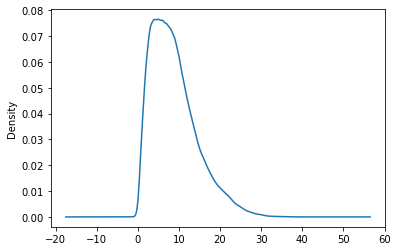

In [9]:
# Visualize the value counts
tweet_time.plot.density()

In [10]:
#Tweets per Hour
trump_df["hour"]=pd.to_datetime(trump_df['time'], format='%H:%M:%S').dt.hour


In [11]:
hours=trump_df.hour.value_counts()

In [12]:
hours.sort_index(ascending=True, inplace=True)

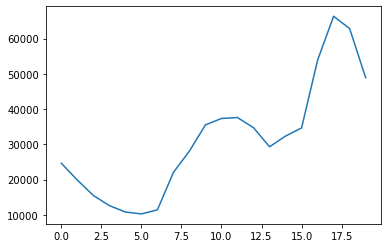

In [13]:
hours.plot()

In [14]:
def cleaned_tweet (row):
    clean_tweet=row["tweet"]
    s = []
    for word in clean_tweet.split():
        if '@' not in word and 'https' not in word and '#' not in word:
            s.append(word)
    return (' ').join(s)

In [15]:
def label_na (row):
    if len(row['cleaned_tweet'].strip())==0: 
        return np.NaN
    else:
        return row["cleaned_tweet"]

In [16]:
trump_df["cleaned_tweet"]=trump_df.apply (lambda row: cleaned_tweet(row), axis=1)

In [17]:
trump_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to,hour,cleaned_tweet
0,1.312910e+18,1.312860e+18,2020-10-04 19:59:59 Eastern Daylight Time,10/4/2020,19:59:59,-400,1.252360e+18,edwardg51650120,Edward Graham,@HKrassenstein @realDonaldTrump And gonna show...,...,0,1,[],[],https://twitter.com/EdwardG51650120/status/131...,0,NaN,"{'user_id': '963790885937995777', 'username': ...",19,And gonna show everyone you get it and get ove...
1,1.312910e+18,1.312790e+18,2020-10-04 19:59:59 Eastern Daylight Time,10/4/2020,19:59:59,-400,1.237850e+18,covidwatcher,carla,@bonnieandsteveh @WomenPatriots @johnrobertsFo...,...,0,0,[],[],https://twitter.com/CovidWatcher/status/131290...,0,NaN,"{'user_id': '72601708', 'username': 'bonnieand...",19,
2,1.312910e+18,1.312890e+18,2020-10-04 19:59:59 Eastern Daylight Time,10/4/2020,19:59:59,-400,8.260320e+17,jhatchett1971,Jennifer Hatchett,@VFL2013 @realDonaldTrump If I have to crawl t...,...,0,1,[],[],https://twitter.com/jhatchett1971/status/13129...,0,NaN,"{'user_id': '1045558231', 'username': 'VFL2013'}",19,If I have to crawl to the polls.
3,1.312910e+18,1.312870e+18,2020-10-04 19:59:59 Eastern Daylight Time,10/4/2020,19:59:59,-400,2.655506e+08,byrdluver,Misanthropic Birdwatcher,@JReinerMD @JohnJHarwood I don't EVER want to ...,...,0,3,[],[],https://twitter.com/byrdluver/status/131290533...,0,NaN,"{'user_id': '537795028', 'username': 'JReinerMD'}",19,I don't EVER want to hear Donald Trump say how...
4,1.312910e+18,1.312860e+18,2020-10-04 19:59:59 Eastern Daylight Time,10/4/2020,19:59:59,-400,6.250172e+08,iceboundrio,tarzan,@mclaurenseries @realDonaldTrump What the duck...,...,0,0,[],[],https://twitter.com/IceboundRio/status/1312905...,0,NaN,"{'user_id': '2923474450', 'username': 'mclaure...",19,What the duck dude. What. The. Duck


In [20]:
trump_df = trump_df[trump_df['cleaned_tweet'].notna()]

trump_df.head()

In [21]:
trump_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,retweets_count,likes_count,hashtags,cashtags,link,video,thumbnail,reply_to,hour,cleaned_tweet
0,1.312910e+18,1.312860e+18,2020-10-04 19:59:59 Eastern Daylight Time,10/4/2020,19:59:59,-400,1.252360e+18,edwardg51650120,Edward Graham,@HKrassenstein @realDonaldTrump And gonna show...,...,0,1,[],[],https://twitter.com/EdwardG51650120/status/131...,0,NaN,"{'user_id': '963790885937995777', 'username': ...",19,And gonna show everyone you get it and get ove...
1,1.312910e+18,1.312790e+18,2020-10-04 19:59:59 Eastern Daylight Time,10/4/2020,19:59:59,-400,1.237850e+18,covidwatcher,carla,@bonnieandsteveh @WomenPatriots @johnrobertsFo...,...,0,0,[],[],https://twitter.com/CovidWatcher/status/131290...,0,NaN,"{'user_id': '72601708', 'username': 'bonnieand...",19,
2,1.312910e+18,1.312890e+18,2020-10-04 19:59:59 Eastern Daylight Time,10/4/2020,19:59:59,-400,8.260320e+17,jhatchett1971,Jennifer Hatchett,@VFL2013 @realDonaldTrump If I have to crawl t...,...,0,1,[],[],https://twitter.com/jhatchett1971/status/13129...,0,NaN,"{'user_id': '1045558231', 'username': 'VFL2013'}",19,If I have to crawl to the polls.
3,1.312910e+18,1.312870e+18,2020-10-04 19:59:59 Eastern Daylight Time,10/4/2020,19:59:59,-400,2.655506e+08,byrdluver,Misanthropic Birdwatcher,@JReinerMD @JohnJHarwood I don't EVER want to ...,...,0,3,[],[],https://twitter.com/byrdluver/status/131290533...,0,NaN,"{'user_id': '537795028', 'username': 'JReinerMD'}",19,I don't EVER want to hear Donald Trump say how...
4,1.312910e+18,1.312860e+18,2020-10-04 19:59:59 Eastern Daylight Time,10/4/2020,19:59:59,-400,6.250172e+08,iceboundrio,tarzan,@mclaurenseries @realDonaldTrump What the duck...,...,0,0,[],[],https://twitter.com/IceboundRio/status/1312905...,0,NaN,"{'user_id': '2923474450', 'username': 'mclaure...",19,What the duck dude. What. The. Duck


In [22]:
trump_df.to_csv('super_clean_trump_df.csv', index = False)